In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


## Data Collection

In [2]:
ins = pd.read_csv("../input/insurance/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins.info() # NO missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Missing Values ??

In [4]:
ins.isnull().sum()# NO missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Descriptive Statistics

In [5]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


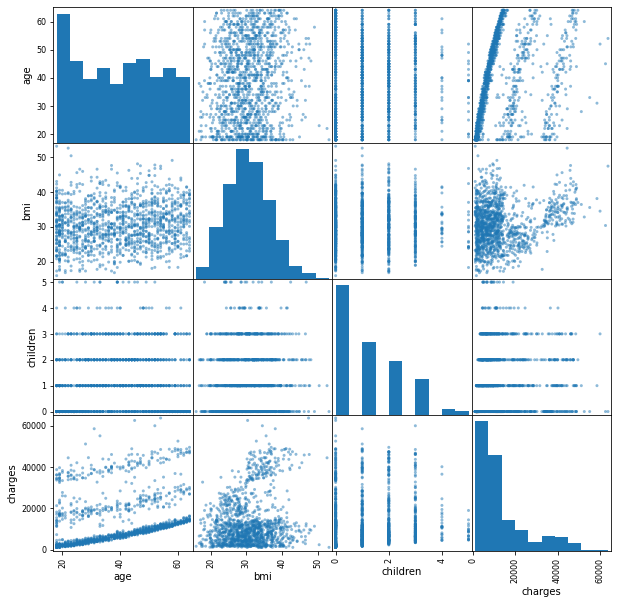

In [6]:
# EDA
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#fig = plt.figure(figsize = (10,10))
scatter_matrix(ins[["age", "bmi","children", "charges"]], figsize = (10,10))
plt.xticks(rotation = 90)
plt.show()

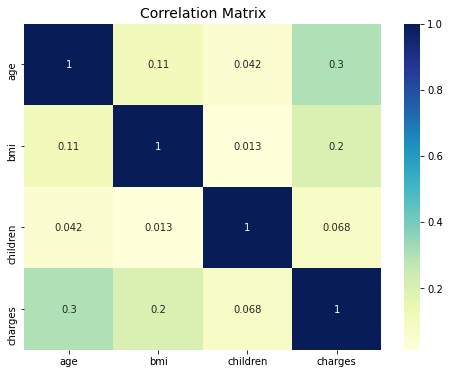

In [7]:
# Checking correlation coeff using a heatmap
import seaborn as sns
ins_corr = ins.corr()
plt.figure(figsize = (8,6))
sns.heatmap(ins_corr, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", fontsize = 14)
plt.show()

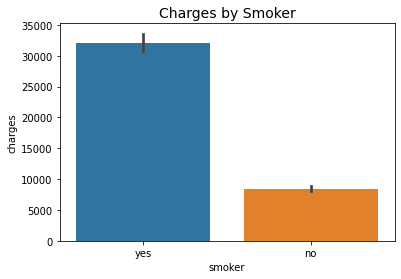

In [8]:
sns.barplot(data=ins, x = "smoker", y = "charges")
plt.title("Charges by Smoker", fontsize = 14)
plt.show()

In [9]:
grp_by_smoker = ins.groupby("smoker")
avg_charge_by_smoker = grp_by_smoker["charges"].mean()
(avg_charge_by_smoker["yes"] - avg_charge_by_smoker["no"])/avg_charge_by_smoker["no"]*100
#The charges vary depending whether or not one is smoker.


280.00014582983204

In [10]:
avg_charge_by_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [11]:
grp_by_age = ins.groupby([pd.cut(ins["age"], bins = 5), "smoker"])
mean_charges_by_age = grp_by_age["charges"].mean().reset_index()
mean_charges_by_age.age = mean_charges_by_age.age.astype("str")
mean_charges_by_age.groupby("age")["charges"].sum()

mean_charges_by_age["total_charges_by_age"] = mean_charges_by_age.groupby("age").transform(np.sum)["charges"]


In [12]:
mean_charges_by_age_smoke = mean_charges_by_age.pivot(index = 'age', columns = "smoker", values = "charges").copy()
mean_charges_by_age_smoke

smoker,no,yes
age,,
"(17.954, 27.2]",4137.989931,27457.382643
"(27.2, 36.4]",5998.176866,29664.755384
"(36.4, 45.6]",8048.552697,32295.172825
"(45.6, 54.8]",11438.346490,34816.508707
"(54.8, 64.0]",14064.827492,39696.365439


In [13]:
mean_charges_by_age_smoke["diff_smoker_non_smoker"] = (mean_charges_by_age_smoke["yes"] - mean_charges_by_age_smoke["no"])
mean_charges_by_age_smoke["pct_over_non_smoker"] = (mean_charges_by_age_smoke["yes"] - mean_charges_by_age_smoke["no"])/mean_charges_by_age_smoke["no"]*100
mean_charges_by_age_smoke

smoker,no,yes,diff_smoker_non_smoker,pct_over_non_smoker
age,,,,
"(17.954, 27.2]",4137.989931,27457.382643,23319.392712,563.543969
"(27.2, 36.4]",5998.176866,29664.755384,23666.578517,394.562865
"(36.4, 45.6]",8048.552697,32295.172825,24246.620128,301.254412
"(45.6, 54.8]",11438.346490,34816.508707,23378.162217,204.384106
"(54.8, 64.0]",14064.827492,39696.365439,25631.537947,182.238552


Text(0.5, 1.0, 'Distribution Charges by Age group and Smoker')

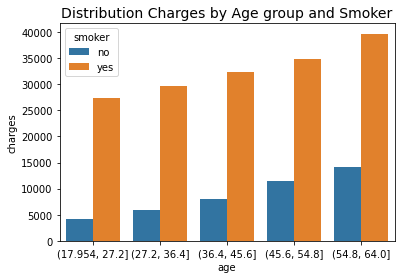

In [14]:
sns.barplot(x = 'age', y = 'charges', data = mean_charges_by_age, hue = "smoker")
plt.title("Distribution Charges by Age group and Smoker", fontsize = 14)


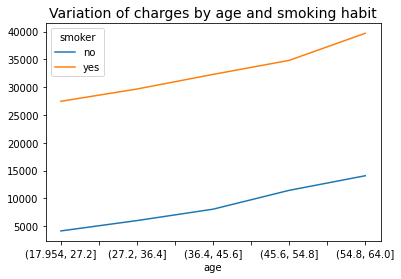

In [15]:
mean_charges_by_age.pivot(index = "age", columns = "smoker", values = "charges").plot()
plt.title("Variation of charges by age and smoking habit", fontsize = 14)
plt.show()

There are 2 interesting observations
1. The charges keep increasinig with age
2. For an age group, the smoker pays more than the non smoker

<BarContainer object of 1338 artists>

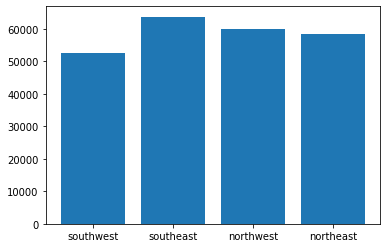

In [16]:
# Does region have an influence on the charges
plt.bar(x = ins.region, height = ins.charges)

In [17]:
mean_charge_by_region = ins.groupby("region").mean().reset_index()
mean_charge_by_region

,region,age,bmi,children,charges
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.196923,29.199785,1.147692,12417.575374
2,southeast,38.939560,33.355989,1.049451,14735.411438
3,southwest,39.455385,30.596615,1.141538,12346.937377


In [18]:
grp_by_region_smoker = ins.groupby(["region", "smoker"])
mean_charge_by_region_smoker = grp_by_region_smoker["charges"].mean().reset_index()
mean_charge_by_region_smoker

,region,smoker,charges
0,northeast,no,9165.531672
1,northeast,yes,29673.536473
2,northwest,no,8556.463715
3,northwest,yes,30192.003182
4,southeast,no,8032.216309
5,southeast,yes,34844.996824
6,southwest,no,8019.284513
7,southwest,yes,32269.063494


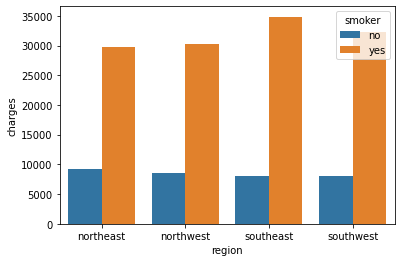

In [19]:
sns.barplot(data = mean_charge_by_region_smoker, x = "region", y = "charges", hue = "smoker")
plt.show()

<AxesSubplot:xlabel='region'>

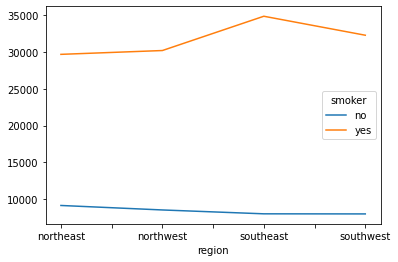

In [20]:
mean_charge_by_region_smoker.pivot(index = "region", columns = "smoker", values = "charges").plot()

In [21]:
mean_charge_by_region_smoker.groupby("region").describe()

charges                                                         \
            count          mean           std          min           25%   
region                                                                     
northeast     2.0  19419.534072  14501.349263  9165.531672  14292.532872   
northwest     2.0  19374.233449  15298.636672  8556.463715  13965.348582   
southeast     2.0  21438.606566  18959.498924  8032.216309  14735.411438   
southwest     2.0  20144.174003  17147.183159  8019.284513  14081.729258   

                                                     
                    50%           75%           max  
region                                               
northeast  19419.534072  24546.535273  29673.536473  
northwest  19374.233449  24783.118316  30192.003182  
southeast  21438.606566  28141.801695  34844.996824  
southwest  20144.174003  26206.618748  32269.063494

A non-smoker pays lesser charges in South East region. 

Also, a smoker pays higher charges in southeast region.For a smoker, the northeast region will incur low charges. For a non-smoker, south east region will incur the low charges

In [22]:
# PREDICTION
# ins.groupby(["sex",])["charges"].mean() # almost the same 

grp_by_age_sex = ins.groupby([pd.cut(ins["age"], bins = 5), "sex", "smoker"])
grp_by_age_sex["charges"].mean().reset_index()

,age,sex,smoker,charges
0,"(17.954, 27.2]",female,no,4790.240704
1,"(17.954, 27.2]",female,yes,25392.476195
2,"(17.954, 27.2]",male,no,3508.230564
3,"(17.954, 27.2]",male,yes,29090.099369
4,"(27.2, 36.4]",female,no,5581.764914
5,"(27.2, 36.4]",female,yes,29962.706778
6,"(27.2, 36.4]",male,no,6466.640313
7,"(27.2, 36.4]",male,yes,29511.265272
8,"(36.4, 45.6]",female,no,8214.241135
9,"(36.4, 45.6]",female,yes,30886.347177


In [23]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex","smoker", "region"]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_cat = ohe.fit_transform(ins[cat_attribs])
encoded_cat.toarray()
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [25]:
def OHE_attribs(df, cat_attribs):
    ohe = OneHotEncoder()
    encoded_cols = ohe.fit_transform(df[cat_attribs])
    cat_columns = []
    for i in range(len(cat_attribs)):
        for j in ohe.categories_[i]:
            cat_columns.append(cat_attribs[i]+'_'+str(j))
    return cat_columns,encoded_cols.toarray()
    
cat_cols,encoded_cols  = OHE_attribs(ins,cat_attribs )
cat_cols, encoded_cols

(['sex_female',
  'sex_male',
  'smoker_no',
  'smoker_yes',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest'],
 array([[1., 0., 0., ..., 0., 0., 1.],
        [0., 1., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 0., 1., 0.],
        ...,
        [1., 0., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 0., 1.],
        [1., 0., 0., ..., 1., 0., 0.]]))

In [26]:
ins_df = ins[num_attribs].merge(pd.DataFrame(encoded_cols, columns = cat_cols), how = "left", right_index = True, left_index = True)
ins_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
X = ins_df.values
y = ins["charges"].values
X.shape, y.shape

((1338, 11), (1338,))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [29]:
from sklearn.metrics import mean_squared_error
def accuracy_check(y_pred, y_test):
    mse = mean_squared_error(y_pred, y_test)
    return round(np.sqrt(mse),2)

In [30]:
# LInear_Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
training_acc = accuracy_check(y_pred_train, y_train)
training_acc

6065.29

In [31]:
y_pred_test = lin_reg.predict(X_test)
test_acc = accuracy_check(y_pred_test, y_test)
test_acc

5956.45

In [32]:
# Cross Validation using Linear Regression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg,X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
lin_reg_score = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", np.round(scores,2))
    print("Mean :", np.round(scores.mean(),2))
    print("Std. :", np.round(scores.std(),2))

display_scores(lin_reg_score)

Scores: [6120.94 6915.09 6286.84 4975.05 6194.07 6391.12 5659.8  6624.67 6261.62
 5584.41]
Mean : 6101.36
Std. : 531.02


In [33]:
# Testing with Decison Tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

scores = cross_val_score(dtree, X_train, y_train, scoring = "neg_mean_squared_error", cv =10)
dtree_scores = np.sqrt(-scores)
display_scores(dtree_scores)


Scores: [6466.56 7180.77 6463.46 6108.64 8125.18 6952.5  6756.1  6580.53 6828.4
 4869.97]
Mean : 6633.21
Std. : 782.59


In [34]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
scores = cross_val_score(forest_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
forest_reg_scores = np.sqrt(-scores)

display_scores(forest_reg_scores) # Best performer

Scores: [4875.93 5675.54 5167.81 3804.72 5370.42 5163.32 4810.29 5442.27 4531.42
 4200.65]
Mean : 4904.24
Std. : 555.96


In [35]:
# Let us see the testing scores
y_pred = lin_reg.predict(X_test)
accuracy_check(y_pred, y_test)

5956.45

In [36]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy_check(y_pred, y_test)

6021.83

In [37]:
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
accuracy_check(y_pred, y_test)

4636.31

In [38]:
# Tuning the model with GridSearchCV
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8,10]},
    {'bootstrap': [False], 'n_estimators':[5,15], 'max_features': [3,5]}
]
grid_search = GridSearchCV(forest_reg, params, cv = 5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [3, 5],
                          'n_estimators': [5, 15]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [40]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [41]:
for (mean_test_scores, params) in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
    print(params, np.sqrt(-mean_test_scores))

{'max_features': 2, 'n_estimators': 3} 5924.355210296305
{'max_features': 2, 'n_estimators': 10} 5364.142002302906
{'max_features': 2, 'n_estimators': 30} 5156.575286468349
{'max_features': 4, 'n_estimators': 3} 5652.645942818474
{'max_features': 4, 'n_estimators': 10} 5012.195315631174
{'max_features': 4, 'n_estimators': 30} 4873.142770170952
{'max_features': 6, 'n_estimators': 3} 5477.8490035707555
{'max_features': 6, 'n_estimators': 10} 5012.438855954847
{'max_features': 6, 'n_estimators': 30} 4771.406606179156
{'max_features': 8, 'n_estimators': 3} 5295.913871846575
{'max_features': 8, 'n_estimators': 10} 5028.681701334741
{'max_features': 8, 'n_estimators': 30} 4882.129983963804
{'max_features': 10, 'n_estimators': 3} 5332.765345660592
{'max_features': 10, 'n_estimators': 10} 5105.592143231568
{'max_features': 10, 'n_estimators': 30} 4939.522089714799
{'bootstrap': False, 'max_features': 3, 'n_estimators': 5} 5513.845444911943
{'bootstrap': False, 'max_features': 3, 'n_estimators'

In [42]:
final_model = grid_search.best_estimator_

y_pred_final = final_model.predict(X_test)
accuracy_check(y_pred_final, y_test)

4662.74

In [43]:
from scipy import stats
confidence = 0.95
sq_error = (y_pred_final - y_test)**2

np.sqrt(stats.t.interval(confidence, len(sq_error)-1, sq_error.mean(), stats.sem(sq_error)))

array([3668.47060654, 5479.47735374])

This is the range estimate of the error in the population with 95% confidence. So